In [1]:
import numpy as np

def line_search(f, x, direction, tol=1e-5, max_iter=100):
    """
    Perform a line search along a given direction to minimize the function f.

    Parameters:
    f         : The function to minimize.
    x         : The starting point (numpy array).
    direction : The direction in which to search.
    tol       : Tolerance for convergence.
    max_iter  : Maximum number of iterations.

    Returns:
    x_new     : The new point after performing the line search.
    """
    alpha = 0
    beta = 1.0
    iter_count = 0

    # Perform a basic line search using the golden section method
    while beta - alpha > tol and iter_count < max_iter:
        mid1 = alpha + 0.382 * (beta - alpha)
        mid2 = alpha + 0.618 * (beta - alpha)

        f1 = f(x + mid1 * direction)
        f2 = f(x + mid2 * direction)

        if f1 < f2:
            beta = mid2
        else:
            alpha = mid1

        iter_count += 1

    # Return the optimal step in the given direction
    optimal_step = (alpha + beta) / 2
    return x + optimal_step * direction

def powell_method(f, x0, tol=1e-5, max_iter=1000):
    """
    Implementation of Powell's method for multivariable optimization.

    Parameters:
    f        : The function to minimize.
    x0       : The starting point (numpy array).
    tol      : Tolerance for convergence.
    max_iter : Maximum number of iterations.

    Returns:
    x_min    : The point that minimizes the function.
    f_min    : The function value at the minimum point.
    iter_count : The number of iterations performed.
    """
    n = len(x0)  # Number of variables
    directions = np.eye(n)  # Initial set of directions (identity matrix)
    x = np.copy(x0)  # Starting point
    iter_count = 0

    while iter_count < max_iter:
        x_start = np.copy(x)

        for i in range(n):
            # Perform a line search along the current direction
            x = line_search(f, x, directions[i], tol)

        # Construct the new direction based on the change in x
        new_direction = x - x_start
        if np.linalg.norm(new_direction) < tol:
            # Convergence check
            break

        # Perform a line search along the new direction
        x = line_search(f, x, new_direction, tol)

        # Update the set of directions
        directions = np.roll(directions, -1, axis=0)  # Shift directions
        directions[-1] = new_direction / np.linalg.norm(new_direction)

        iter_count += 1

        # Check for convergence
        if np.linalg.norm(x - x_start) < tol:
            break

    f_min = f(x)
    return x, f_min, iter_count


# Example usage
if __name__ == "__main__":
    # Define a sample multivariable function (e.g., Rosenbrock function)
    def rosenbrock(x):
        return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2  # A common test function

    # Starting point
    x0 = np.array([-1.2, 1.0])

    # Call the Powell optimization method
    x_min, f_min, iterations = powell_method(rosenbrock, x0)

    # Output the result
    print(f"Minimum point: {x_min}")
    print(f"Function value at minimum: {f_min}")
    print(f"Iterations: {iterations}")


Minimum point: [-0.99497059  1.00000963]
Function value at minimum: 3.9899941558648795
Iterations: 1


In [2]:
import numpy as np

def line_search(f, x, direction, tol=1e-5, max_iter=100):
    """
    Perform a line search along a given direction to minimize the function f.

    Parameters:
    f         : The function to minimize.
    x         : The starting point (numpy array).
    direction : The direction in which to search.
    tol       : Tolerance for convergence.
    max_iter  : Maximum number of iterations.

    Returns:
    x_new     : The new point after performing the line search.
    """
    alpha_min, alpha_max = 0, 1.0
    iter_count = 0

    while alpha_max - alpha_min > tol and iter_count < max_iter:
        alpha1 = alpha_min + 0.382 * (alpha_max - alpha_min)
        alpha2 = alpha_min + 0.618 * (alpha_max - alpha_min)
        
        f1 = f(x + alpha1 * direction)
        f2 = f(x + alpha2 * direction)

        if f1 < f2:
            alpha_max = alpha2
        else:
            alpha_min = alpha1

        iter_count += 1

    # Optimal alpha (step size) in the given direction
    alpha_opt = (alpha_min + alpha_max) / 2
    return x + alpha_opt * direction

def powell_method(f, x0, tol=1e-5, max_iter=1000):
    """
    Powell's method for multivariable optimization.

    Parameters:
    f        : The function to minimize.
    x0       : The starting point (numpy array).
    tol      : Tolerance for convergence.
    max_iter : Maximum number of iterations.

    Returns:
    x_min    : The point that minimizes the function.
    f_min    : The function value at the minimum point.
    iter_count : The number of iterations performed.
    """
    n = len(x0)  # Number of variables
    directions = np.eye(n)  # Initial direction set (identity matrix)
    x = np.copy(x0)  # Starting point
    iter_count = 0

    for _ in range(max_iter):
        x_start = np.copy(x)

        # Perform a line search along each direction in sequence
        for i in range(n):
            x = line_search(f, x, directions[i], tol)

        # Determine the overall displacement from the starting point
        new_direction = x - x_start

        # Check for convergence
        if np.linalg.norm(new_direction) < tol:
            break

        # Perform a line search along the new direction
        x = line_search(f, x, new_direction, tol)

        # Replace the first direction with the new direction
        directions = np.roll(directions, -1, axis=0)
        directions[-1] = new_direction / np.linalg.norm(new_direction)

        iter_count += 1

        # Check for convergence again
        if np.linalg.norm(x - x_start) < tol:
            break

    f_min = f(x)
    return x, f_min, iter_count


# Example usage
if __name__ == "__main__":
    # Define a sample multivariable function (e.g., Rosenbrock function)
    def rosenbrock(x):
        return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

    # Starting point
    x0 = np.array([-1.2, 1.0])

    # Call the Powell optimization method
    x_min, f_min, iterations = powell_method(rosenbrock, x0)

    # Output the result
    print(f"Minimum point: {x_min}")
    print(f"Function value at minimum: {f_min}")
    print(f"Iterations: {iterations}")


Minimum point: [-0.99497059  1.00000963]
Function value at minimum: 3.9899941558648795
Iterations: 1


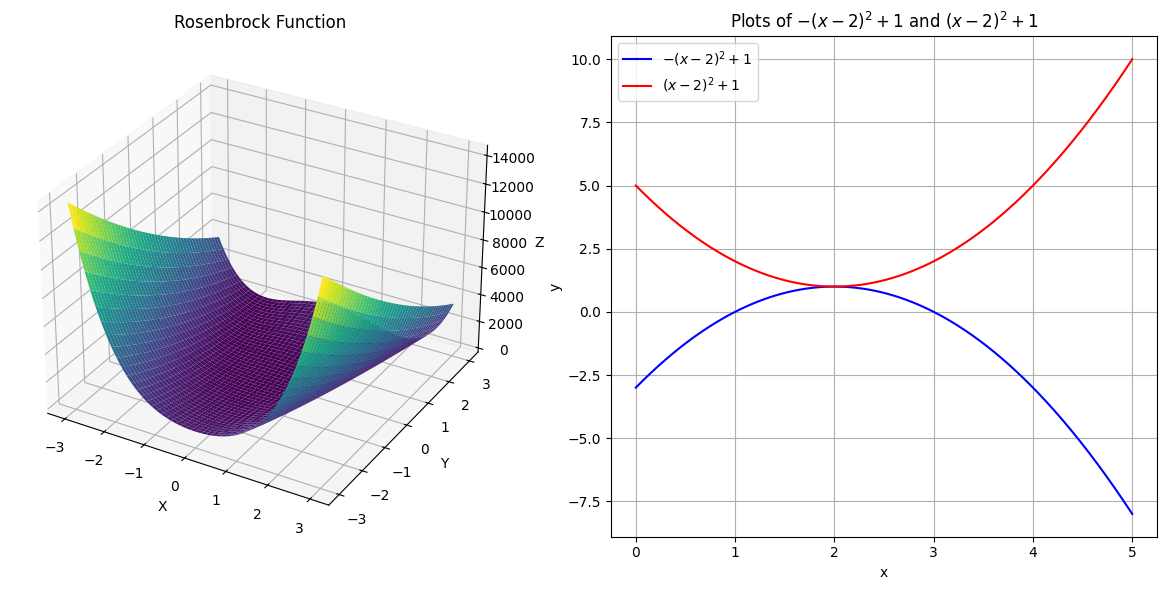

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions
def rosenbrock(X, Y):
    return 100 * (Y - X**2)**2 + (1 - X)**2  # Rosenbrock function

def f1(x):
    return -(x - 2)**2 + 1  # Inverted parabola

def f2(x):
    return (x - 2)**2 + 1  # Regular parabola

# Create a grid of values for the Rosenbrock function (2D function)
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z_rosenbrock = rosenbrock(X, Y)

# Create the data for the 1D functions
x_1d = np.linspace(0, 5, 400)
y_f1 = f1(x_1d)
y_f2 = f2(x_1d)

# Set up the plot
fig = plt.figure(figsize=(12, 6))

# Plot 1: Rosenbrock function (3D plot)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_rosenbrock, cmap='viridis', edgecolor='none')
ax1.set_title('Rosenbrock Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot 2: 1D functions (2D plot)
ax2 = fig.add_subplot(122)
ax2.plot(x_1d, y_f1, label=r'$-(x - 2)^2 + 1$', color='blue')
ax2.plot(x_1d, y_f2, label=r'$(x - 2)^2 + 1$', color='red')
ax2.set_title('Plots of $-(x - 2)^2 + 1$ and $(x - 2)^2 + 1$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True)

# Show both plots
plt.tight_layout()
plt.show()
